In [1]:
#imports for website dev
import dash
import dash_core_components as dcc
import dash_html_components as html

#imports for reading csv/plotting
import pandas as pd
import numpy as np
import plotly.graph_objs as go

#other imports
import os
import datetime

In [2]:
daily_data_path = os.path.join('data', 'daily_sales.csv')
monthly_data_path = os.path.join('data', 'monthly_sales.csv')

daily = pd.read_csv(daily_data_path)
monthly = pd.read_csv(monthly_data_path)

In [42]:
daily['Day of Week'] = pd.Categorical(daily['Day of Week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [128]:
avgs = daily.groupby('Day of Week').apply(np.mean)
avgs

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
Day of Week,,,,,,,,,,,,,,,
Monday,36851.75,16411.00,9284.25,34916.0,16115.00,9241.25,37262.75,15342.5,8649.75,35160.25,14291.5,8712.75,37177.75,14883.75,8863.50
Tuesday,37134.25,16027.75,9576.50,35669.0,14758.75,8891.50,36158.50,15496.5,8787.75,34840.50,15077.5,8402.50,36539.50,14164.75,8498.00
Wednesday,36671.75,16443.75,9513.75,36445.0,15202.00,9503.50,36393.75,15431.0,9328.75,35664.75,14814.5,8867.50,36129.50,14558.00,8992.00
Thursday,36636.00,16469.50,11797.50,35963.5,14483.00,9390.75,35413.00,16250.5,9273.75,35132.75,14579.0,8802.25,36322.00,14123.00,9093.25
Friday,36478.20,15701.60,7634.20,37828.4,15783.60,10821.00,36121.60,15422.8,10405.60,35506.80,14695.2,11769.40,35986.00,14296.00,12136.60
Saturday,36361.20,14994.20,7400.20,35949.2,14175.00,7992.80,35332.20,15176.4,8536.60,36173.40,14735.8,7831.40,36550.40,14779.20,8345.40
Sunday,37516.60,15983.00,9875.60,36740.6,15308.00,7792.80,34687.40,15800.2,7806.60,34688.00,14811.8,7322.80,35823.80,14932.80,7484.40


In [112]:
regional = avgs.T
regional.index = [regional.index.str[:2], regional.index.str[3:]]
regional = regional.rename_axis(("food", "region"))
regional.sort_index(inplace = True)

In [150]:
food = ['HM', 'CF', 'FF']

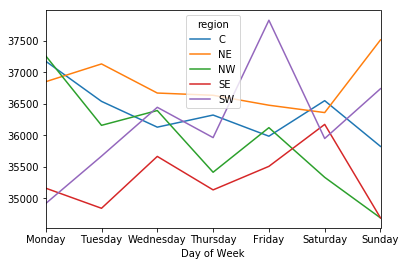

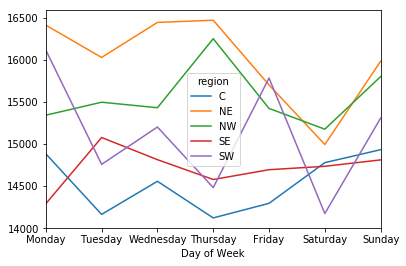

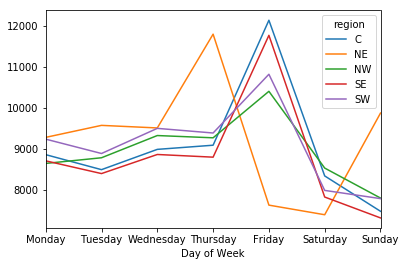

In [149]:
for i in food:
    regional.loc[i].T.plot()

In [136]:
peak_days = regional.T.idxmax()
weak_days = regional.T.idxmin()
daysFrame = pd.DataFrame([peak_days, weak_days], index = ['Average Peak', 'Average Weak']).T
daysFrame

Average Peak Average Weak
food region                          
CF   C            Sunday     Thursday
     NE         Thursday     Saturday
     NW         Thursday     Saturday
     SE          Tuesday       Monday
     SW           Monday     Saturday
FF   C            Friday       Sunday
     NE         Thursday     Saturday
     NW           Friday       Sunday
     SE           Friday       Sunday
     SW           Friday       Sunday
HM   C            Monday       Sunday
     NE           Sunday     Saturday
     NW           Monday       Sunday
     SE         Saturday       Sunday
     SW           Friday       Monday

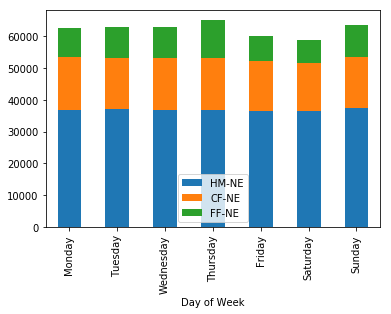

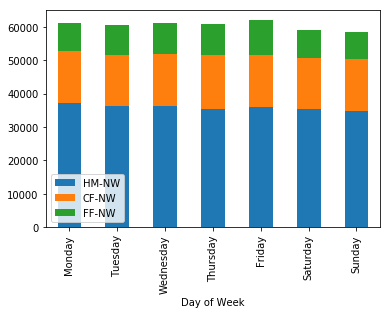

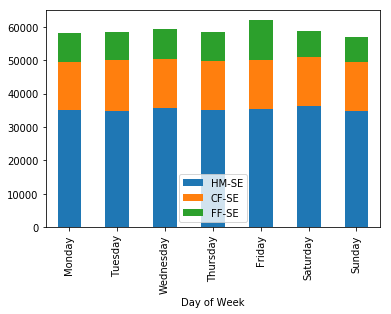

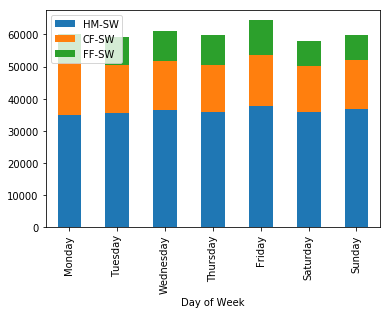

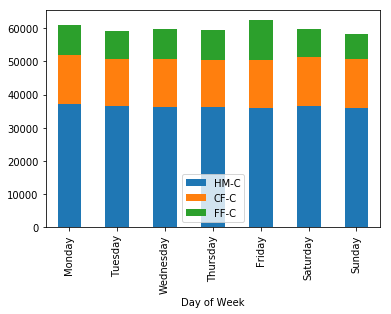

In [137]:
regions = ['NE', 'NW', 'SE', 'SW', 'C']
for reg in regions:
    reg_label = '-' + reg
    region_cols = [col for col in avgs.columns if reg_label in col]
    avgs[region_cols].plot.bar(stacked = True)